# SISTEMAS DE RECOMENDACIÓN

<img src="portada.jpg" align="center" width="60%"/>

En las últimas décadas, con el surgimiento y popularización de YouTube, Amazon, Netflix, y otros servicios web, los sistemas de recomendación tomaron más y más lugar en nuestras vidas. Los sistemas de recomendación se han convertido en parte de nuestro día a día, con aplicaciones que van desde el e-commerce, que sugieren a los clientes artículos que podrían interesarles, hasta la publicidad digital, que sugieren a los usuarios los contenidos adecuados que coinciden con sus preferencias.
<br>

**En su definición más general, los sistemas de recomendación son algoritmos que sugieren ítems relevantes a usuarios, entendiendo por ítems películas, libros, productos, etc..**
<br>

Los sistemas de recomendación son críticos en algunas industrias en tanto pueden generar muchos ingresos (cuando funcionan bien :), o bien como una forma de diferenciarse significativamente de los competidores.
<br>

### Ejemplo: caso Netflix
<br>
<img src="netflix.png" align="center" width="60%"/>

En 2006 Netflix organizó un desafio, the "Netflix Prize", en el que el objetivo era producir un sistema de recomendación que mejorara la métrica RMSE del algoritmo existente ("Cinematch") en ese momento de forma significativa, con un premio de U$S1 millón de dólares.

El conjunto de entrenamiento contenía los campos usuario, película, fecha, rating, siendo el rating un número entero entre 1 y 5. Constaba de 100M ratings que 480k usuarios le otorgaron a 17k películas. 
<br>

El conjunto de prueba contaba con 2,8M de tuplas usuario, película, fecha. En la mitad de ellos se proveía la información del rating (de forma tal que pudiera ser utilizada para evaluación de los modelos entrenados, y para la tabla de posiciones visible públicamente), mientras que los grupos participantes fueron evaluados a partir de sus predicciones sobre la otra mitad, de la cual no se proveía el rating.

Finalmente, en 2009 un supergrupo llamado BellKor's Pragmatic Chaos (unión de varios equipos) logra la meta propuesta, al lograr mejorar la métrica en cuestión en un 10%.

<img src="netflix2.jpg" align="center" width="60%"/>

Existen dos grandes familias de algoritmos de sistemas de recomendación: los filtros colaborativos y los métodos basados en contenidos. Veamos de que se tratan.

## FILTROS COLABORATIVOS

Los filtros colaborativos son métodos basados únicamente en las interacciones pasadas registradas entre los usuarios y los ítems de forma tal de producir nuevas recomendaciones. Estas interacciones se almacenan en las denominadas *"matrices de interacción usuario-ítem"*.

<img src="matrices.png" align="center" width="100%"/>

Vemos aquí algunos ejemplos de usuario/ítem/rating, según el tipo de industria: 
- Suscriptores -> películas -> ratings (entero)
- Lectores -> artículos -> tiempo destinado a leer un artículo (flotante)
- Compradores -> productos -> producto clickeado o no al ser sugerido (booleano)

La idea principal de estos métodos es que las interacciones pasadas de usuarios e ítems son suficientes para detectar usuarios similares y/o ítems similares, para así hacer predicciones basadas en estas proximidades estimadas.
<br>

Esta familia de métodos incluye dos subcategorías:
- Basadas en memoria (*memory based*): asumen que no hay un modelo, y se basan en la búsqueda de vecinos más cercanos. Por ej., buscan los vecinos más cercanos a un usuario target, y sugieren los ítems más populares entre estos usuarios.
- Basados en modelos: asumen que hay un modelo generativo subyacente que explica las interacciones usuario-ítem y buscan descubrirlo para realizar predicciones.

La mayor ventaja de los métodos colaborativos es que no requieren ninguna información sobre los usuarios y los ítems y, por lo tanto, pueden ser utilizados en múltiples contextos. Más aún, cuanto más interactúen los usuarios con los ítems más certeras se vuelven las nuevas recomendaciones: para un conjunto fijo de usuarios e ítems, las nuevas interacciones registradas a lo largo del tiempo proveen información nueva al sistema y lo hacen más eficiente.
<br>

Por otro lado, los métodos colaborativos sufren del problema del arranque en frío (*cold start*), que significa que es imposible recomendarle un ítem a un usuario nuevo o recomendarle un ítem nuevo a cualquier usuario, a su vez que pueden existir usuarios e ítems con muy pocas interacciones para ser gestionados de forma eficiente. Esta desventaja puede ser tratada de diferentes formas:
- Estrategia random: recomendando ítems al azar a nuevos usarios o ítems nuevos a nuevos usuarios.
- Estrategia de expectativa máxima: recomendando ítems populares a nuevos usuarios o nuevos ítems a los usuarios más activos (*¿Entraron alguna vez en YouTube sin estar logueados con su e-mail? ¿Qué videos les recomienda?*).
- Estrategia exploratoria: recomendando un conjunto de ítems variados a nuevos usuarios o un nuevo ítem a varios usuarios.
- Estrategia híbrida: utilizando un sistema no colaborativo para la vida inicial de un usuario o ítem nuevos.

### Métodos basados en memoria (memory based)

Como dijimos, estos métodos utilizan únicamente información de la matriz de interacción usuarios-ítems y no asumen ningún modelo para producir nuevas recomendaciones.

#### Usuario - usuario

Para hacer una nueva recomendación a un usuario, el método usuario-usuario trata de identificar a los usuarios con el "perfil de interacciones" más similar (es decir, los vecinos más cercanos) para sugerir los ítems más populares entre estos vecinos (y que son "nuevos" para nuestro usuario). Se dice que este método está "centrado en el usuario", ya que representa a los usuarios en función de sus interacciones con los artículos y evalúa las distancias entre usuarios.

Supongamos que queremos hacer una recomendación para un usuario determinado. En primer lugar, cada usuario puede representarse por su vector de interacciones con los distintos artículos (su "línea" en la matriz de interacciones). A continuación, podemos calcular algún tipo de "similitud" entre nuestro usuario de interés y todos los demás usuarios. Esa medida de similitud es tal que dos usuarios con interacciones similares en los mismos ítems deben considerarse cercanos. Una vez calculadas las similitudes con todos los usuarios, podemos quedarnos con los k usuarios más cercanos a nuestro usuario y sugerirle los ítems más populares entre ellos (*teniendo en cuenta únicamente los ítems con los que nuestro usuario de referencia aún no ha interactuado*).

Tener en cuenta que, al calcular la similitud entre usuarios, el número de "interacciones comunes" (¿cuántos elementos han sido considerados ya por ambos usuarios?) debe tenerse en cuenta cuidadosamente. De hecho, la mayoría de las veces, queremos evitar que alguien que sólo tiene una interacción en común con nuestro usuario de referencia pueda tener una coincidencia del 100% y ser considerado como "más cercano" que alguien que tiene 100 interacciones en común y coincide "sólo" en el 98% de ellas. Por lo tanto, consideramos que dos usuarios son similares si han interactuado con **muchos ítems comunes** de la misma manera (valoración similar, tiempo de permanencia similar...).

<img src="user_user.png" align="center" width="40%"/>

<img src="user_user2.png" align="center" width="100%"/>

#### Ejemplo

In [3]:
import math


data = {
	'Alan Perlis': { 
		'Artificial intelligence': 1.46, 
		'Systems programming': 5.0, 
		'Software engineering': 3.34, 
		'Databases': 2.32
	},

	'Marvin Minsky': { 
		'Artificial intelligence': 5.0, 
		'Systems programming': 2.54,
		'Computation': 4.32, 
		'Algorithms': 2.76
	},

	'John McCarthy': { 
		'Artificial intelligence': 5.0, 
		'Programming language theory': 4.72, 
		'Systems programming': 3.25, 
		'Concurrency': 3.61, 
		'Formal methods': 3.58,
		'Computation': 3.23, 
		'Algorithms': 3.03 
	},

	'Edsger Dijkstra': { 
		'Programming language theory': 4.34, 
		'Systems programming': 4.52,
		'Software engineering': 4.04, 
		'Concurrency': 3.97,
		'Formal methods': 5.0, 
		'Algorithms': 4.92 
	},

	'Donald Knuth': { 
		'Programming language theory': 4.33, 
		'Systems programming': 3.57,
		'Computation': 4.39, 
		'Algorithms': 5.0 
	},

	'John Backus': { 
		'Programming language theory': 4.58, 
		'Systems programming': 4.43,
		'Software engineering': 4.38, 
		'Formal methods': 2.42, 
		'Databases': 2.80 
	},

	'Robert Floyd': { 
		'Programming language theory': 4.24, 
		'Systems programming': 2.17,
		'Concurrency': 2.92, 
		'Formal methods': 5.0, 
		'Computation': 3.18, 
		'Algorithms': 5.0 
	},

	'Tony Hoare': { 
		'Programming language theory': 4.64, 
		'Systems programming': 4.38,
		'Software engineering': 3.62, 
		'Concurrency': 4.88,
		'Formal methods': 4.72, 
		'Algorithms': 4.38
	},

	'Edgar Codd': { 
		'Systems programming': 4.60, 
		'Software engineering': 3.54,
		'Concurrency': 4.28, 
		'Formal methods': 1.53, 
		'Databases': 5.0
	},

	'Dennis Ritchie': { 
		'Programming language theory': 3.45, 
		'Systems programming': 5.0,
		'Software engineering': 4.83,
	},

	'Niklaus Wirth': { 
		'Programming language theory': 4.23, 
		'Systems programming': 4.22,
		'Software engineering': 4.74, 
		'Formal methods': 3.83, 
		'Algorithms': 3.95
	},

	'Robin Milner': { 
		'Programming language theory': 5.0, 
		'Systems programming': 1.66,
		'Concurrency': 4.62, 
		'Formal methods': 3.94,
	},

	'Leslie Lamport': { 
		'Programming language theory': 1.5, 
		'Systems programming': 2.76,
		'Software engineering': 3.76, 
		'Concurrency': 5.0,
		'Formal methods': 4.93, 
		'Algorithms': 4.63
	},

	'Michael Stonebraker': { 
		'Systems programming': 4.67, 
		'Software engineering': 3.86,
		'Concurrency': 4.14, 
		'Databases': 5.0,
	},
}

In [15]:
import pandas as pd
df_data=pd.DataFrame(data).transpose()
df_data

,Artificial intelligence,Systems programming,Software engineering,Databases,Computation,Algorithms,Programming language theory,Concurrency,Formal methods
Alan Perlis,1.46,5.00,3.34,2.32,NaN,NaN,NaN,NaN,NaN
Marvin Minsky,5.00,2.54,NaN,NaN,4.32,2.76,NaN,NaN,NaN
John McCarthy,5.00,3.25,NaN,NaN,3.23,3.03,4.72,3.61,3.58
Edsger Dijkstra,NaN,4.52,4.04,NaN,NaN,4.92,4.34,3.97,5.00
Donald Knuth,NaN,3.57,NaN,NaN,4.39,5.00,4.33,NaN,NaN
John Backus,NaN,4.43,4.38,2.80,NaN,NaN,4.58,NaN,2.42
Robert Floyd,NaN,2.17,NaN,NaN,3.18,5.00,4.24,2.92,5.00
Tony Hoare,NaN,4.38,3.62,NaN,NaN,4.38,4.64,4.88,4.72
Edgar Codd,NaN,4.60,3.54,5.00,NaN,NaN,NaN,4.28,1.53
Dennis Ritchie,NaN,5.00,4.83,NaN,NaN,NaN,3.45,NaN,NaN


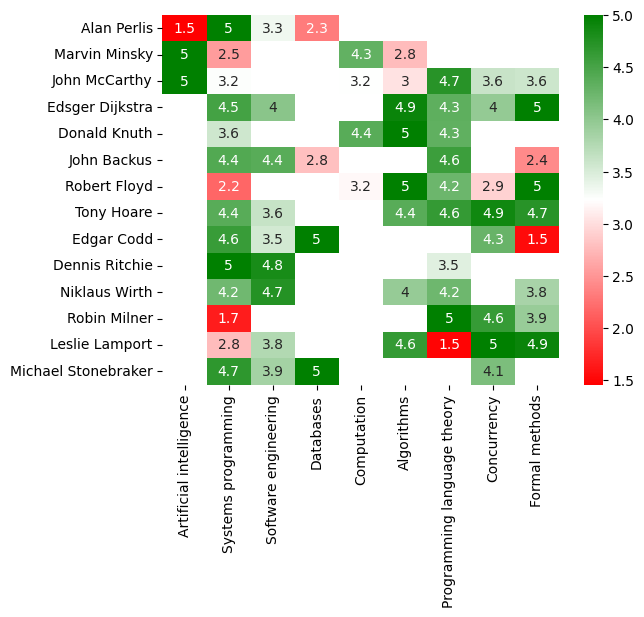

In [18]:
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)
sns.heatmap(df_data, annot=True,cmap=cmap);

In [2]:
def euclidean_similarity(person1, person2):

	common_ranked_items = [itm for itm in data[person1] if itm in data[person2]]
	rankings = [(data[person1][itm], data[person2][itm]) for itm in common_ranked_items]
	distance = [pow(rank[0] - rank[1], 2) for rank in rankings]

	return 1 / (1 + sum(distance))

In [5]:
def pearson_similarity(person1, person2):

	common_ranked_items = [itm for itm in data[person1] if itm in data[person2]]

	n = len(common_ranked_items)

	s1 = sum([data[person1][item] for item in common_ranked_items])
	s2 = sum([data[person2][item] for item in common_ranked_items])

	ss1 = sum([pow(data[person1][item], 2) for item in common_ranked_items])
	ss2 = sum([pow(data[person2][item], 2) for item in common_ranked_items])

	ps = sum([data[person1][item] * data[person2][item] for item in common_ranked_items])

	num = n * ps - (s1 * s2)

	den = math.sqrt((n * ss1 - math.pow(s1, 2)) * (n * ss2 - math.pow(s2, 2)))

	return (num / den) if den != 0 else 0

In [6]:
def recommend(person, bound, similarity=pearson_similarity):
	scores = [(similarity(person, other), other) for other in data if other != person]

	scores.sort()
	scores.reverse()
	scores = scores[0:bound]

	print (scores)

	recomms = {}

	for sim, other in scores:
		ranked = data[other]

		for itm in ranked:
			if itm not in data[person]:
				weight = sim * ranked[itm]

				if itm in recomms:
					s, weights = recomms[itm]
					recomms[itm] = (s + sim, weights + [weight])
				else:
					recomms[itm] = (sim, [weight])

	for r in recomms:
		sim, item = recomms[r]
		recomms[r] = sum(item) / sim

	return recomms

In [7]:
recommend('Alan Perlis', 5, euclidean_similarity)

[(0.6836204539239813, 'Tony Hoare'), (0.5812601720530107, 'Edsger Dijkstra'), (0.37923319048883153, 'John Backus'), (0.3284180104436927, 'Donald Knuth'), (0.31054936182106135, 'Dennis Ritchie')]


{'Programming language theory': 4.347195972640145,
 'Concurrency': 4.461820809248555,
 'Formal methods': 4.2884705749419645,
 'Algorithms': 4.70479765409595,
 'Computation': 4.39}

In [32]:
rec=recommend('Donald Knuth', 5, euclidean_similarity)
pd.DataFrame(rec,index=[0]).transpose().sort_values(by=0,ascending=False)

[(0.5549081626990734, 'John Backus'), (0.5238344683080148, 'Edsger Dijkstra'), (0.48522490174195754, 'Edgar Codd'), (0.46803332397266684, 'Tony Hoare'), (0.45248868778280543, 'Michael Stonebraker')]


,0
Concurrency,4.308547
Databases,4.182112
Software engineering,3.906385
Formal methods,3.402342


#### Ítem - ítem

Para hacer una nueva recomendación a un usuario, la idea del método ítem - ítem es encontrar ítems similares a aquellos con los que el usuario ya ha interactuado "positivamente". Se considera que dos ítems son similares si la mayoría de los usuarios que han interactuado con ambos lo han hecho de forma parecida. Se dice que este método está "centrado en los ítems", ya que representa los ítems en función de las interacciones que los usuarios tuvieron con ellos y evalúa las distancias entre esos ítems.

Supongamos que queremos hacer una recomendación a un usuario determinado. En primer lugar, consideramos el elemento que más le ha gustado a este usuario y lo representamos (como todos los demás elementos) mediante su vector de interacción con todos los usuarios ("su columna" en la matriz de interacción). A continuación, podemos calcular las similitudes entre el "mejor ítem" y todos los demás. Una vez calculadas las similitudes, podemos quedarnos con los k-vecinos más cercanos al "mejor ítem" target que sean nuevos para nuestro usuario de interés y recomendar estos ítems.

Hay que tener en cuenta que, para obtener recomendaciones más pertinentes, podemos hacer este trabajo no sólo para el ítem favorito del usuario, sino también para los n ítems preferidos. En este caso, podemos recomendar ítems cercanos a varios de estos artículos preferidos.

<img src="item_item.png" align="center" width="100%"/>

El método usuario-usuario se basa en la búsqueda de usuarios similares en términos de interacciones con ítems. Como generalmente cada usuario sólo ha interactuado con unos pocos ítems, hace que el método sea bastante sensible a cualquier interacción registrada (es decir, que tiene alta varianza). Por otro lado, como la recomendación final sólo se basa en las interacciones registradas para usuarios similares a nuestro usuario de interés, obtenemos resultados más personalizados (bajo sesgo).

Por el contrario, el método ítem-ítem se basa en la búsqueda de ítems similares en términos de interacciones usuario-ítem. Como, en general, muchos usuarios han interactuado con un ítem, la búsqueda por vecindad es mucho menos sensible a las interacciones aisladas (menor varianza). Como contrapartida, las interacciones procedentes de todo tipo de usuarios (incluso de usuarios muy diferentes de nuestro usuario de referencia) se tienen en cuenta en la recomendación, lo que hace que el método sea menos personalizado (más sesgado). Así pues, este enfoque es menos personalizado que el enfoque usuario-usuario, pero más robusto.

<img src="memory_based.png" align="center" width="100%"/>

#### Problemas de los sistemas basados en memoria

Uno de los mayores problemas del filtrado colaborativo basado en memoria es que no es fácilmente escalable: generar una nueva recomendación puede llevar mucho tiempo en sistemas de gran tamaño. De hecho, para sistemas con millones de usuarios y millones de artículos, la etapa de búsqueda de los vecinos más próximos puede resultar inabordable si no se diseña con cuidado (el algoritmo KNN tiene una complejidad de O(ndk), siendo n el número de usuarios, d el número de ítems y k el número de vecinos considerados).

En la mayoría de los algoritmos de recomendación, hay que ser extremadamente cuidadoso para evitar el efecto "el rico se hace más rico" en el caso de los ítems populares y, por otro lado, evitar que los usuarios queden atrapados en lo que podría denominarse una "zona de confinamiento de la información". En otras palabras, no queremos que nuestro sistema tienda a recomendar cada vez más sólo ítems populares, ni queremos que nuestros usuarios sólo reciban recomendaciones de ítems muy parecidos a los que ya les han gustado, sin posibilidad de conocer nuevos ítems que también podrían gustarles (ya que estos ítems no están "lo suficientemente cerca" como para ser sugeridos). Si, como hemos mencionado, estos problemas pueden surgir en la mayoría de los algoritmos de recomendación, es especialmente cierto para los colaborativos basados en la memoria. 

### Métodos basados en modelos

Los enfoques colaborativos basados en modelos sólo se basan en la información de las interacciones usuario-ítem y asumen un modelo latente que supuestamente explica estas interacciones. Por ejemplo, los algoritmos de factorización matricial consisten en descomponer la enorme matriz dispersa (sparse matrix) de interacciones usuario-ítem en un producto de dos matrices más pequeñas y densas: una matriz usuario-factor (que contiene las representaciones de los usuarios) que multiplica una matriz factor-ítem (que contiene las representaciones de los artículos).

#### Factorización matricial

*La intuición detrás de las matrices de factorización: partiendo de una base de ratings debería haber una serie de features latentes que determinen como un usuario puntúa un ítem.*

Es decir, la hipótesis es que existe un espacio latente de features de dimensiones lo bastante bajas en el que podemos representar tanto a los usuarios como a los ítems, y que la interacción entre un usuario y un ítem puede obtenerse calculando el producto escalar de los vectores densos correspondientes en ese espacio.

De forma similar a la reducción de dimensionalidad, estamos representando a usuarios e ítems en un conjunto de dimensiones más acotado que la matriz de ratings original. A diferencia de los modelos basados en memoria, no representamos a los usuarios (n) en función de los ítems puntuados, sino en base a un conjunto de dimensiones latentes, o embeddings, l. Concomitantemente, no representamos a los ítems (m) en función de los usuarios que los han puntuado, sino en base al mismo conjunto de dimensiones latentes l.

Por ejemplo, consideremos que tenemos una matriz de ratings usuario-película. Para modelar las interacciones entre usuarios y películas, podemos suponer que:
- Existen algunas features que describen (y distinguen) bastante bien las películas. 
- Estas features también pueden utilizarse para describir las preferencias de los usuarios (valores altos para las features que le gustan al usuario, valores bajos en caso contrario).

Sin embargo, no queremos dar explícitamente estas features a nuestro modelo (como podría hacerse con los enfoques basados en el contenido que describiremos más adelante). En su lugar, preferimos dejar que el sistema descubra por sí mismo estas features útiles y cree sus propias representaciones tanto de los usuarios como de los ítems. Como son aprendidas y no dadas, las features extraídas tomadas individualmente tienen un significado matemático pero no una interpretación intuitiva (y, por tanto, son difíciles, si no imposibles, de entender como humanos). Sin embargo, no es raro que las estructuras que surgen de ese tipo de algoritmos se aproximen mucho a la descomposición intuitiva que podría pensar el ser humano (por ej., en el caso de películas, podría implicar mismos actores, mismo director, mismo país de procedencia, etc.). De hecho, la consecuencia de esa factorización es que los usuarios cercanos en cuanto a preferencias, así como los elementos cercanos en cuanto a features, acaban teniendo representaciones cercanas en el espacio latente.

*Si podemos descubrir estas features latentes, deberíamos poder predecir un rating para determinada combinación de ítem y usuario, al multiplicar el vector de features del usuario por el vector de features del ítem.*

<img src="factorización.png" align="center" width="100%"/>

## MÉTODOS BASADOS EN CONTENIDO

A diferencia de los métodos colaborativos que dependen en las interacciones usuario-ítem, los métodos basados en contenido utilzan información adicional de los usuarios y/o ítems. En el caso de un sistema de recomendación de películas, por ejemplo, esta información adicional puede ser, por ejemplo, la edad, el género, el trabajo, o cualquier otro tipo de información para los usuarios así como la categoría, actores principales, la duración, el país, u otras características de las películas (los ítems).
<br>

Así, la idea de los sistemas basados en contenido es la de construir un modelo a partir de las características, o features, disponibles, que expliquen las interacciones usuario-ítem observadas. Por ejemplo, podríamos encontrar regularidades, como ser que las mujeres jóvenes tienden a valorar mejor algunas películas o que los hombres jóvenes tienden a valorar mejor otras películas. Si logramos elaborar un modelo de estas características, la tarea de hacer nuevas predicciones para un nuevo usuario se hace bastante llevadera: simplemente deberemos tener en cuenta el perfil de características del usuario para así, basados en esta información, determinar las películas más relevantes que podríamos sugerir.

<img src="contenido.png" align="center" width="100%"/>

Ejemplo: un usuario tiene preferencia por películas de superhéroes. Le podemos recomendar ítems similares, i.e.: otras películas de superhéroes.

Los métodos basados en contenido sufren menos del problema del arranque en frío que los métodos colaborativos: los nuevos usuarios o ítems pueden descriptos a partir de sus características (el contenido), por lo que se pueden hacer sugerencias relevantes para entidades nuevas. 

En los métodos basados en el contenido, el problema de la recomendación se transforma en un problema de:
- **clasificación**, al predecir si a un usuario "le gusta" o no un ítem
- **regresión**, al predecir la valoración que da un usuario a un ítem 

En ambos casos, vamos a establecer un modelo que se basará en las características del usuario y/o del ítem que tengamos a nuestra disposición (el "contenido" de nuestro método "basado en el contenido").

Si nuestra clasificación (o regresión) se basa en las características de los usuarios, decimos que el enfoque está centrado en el ítem: el modelado, las optimizaciones y los cálculos pueden hacerse "por ítem". En este caso, construimos y aprendemos **un modelo por ítem** basado en las características de los usuarios intentando responder a la pregunta "¿cuál es la probabilidad de que a cada usuario le guste este ítem?" (o "¿cuál es el rating dado por cada usuario a este ítem?", para la regresión).

El modelo asociado a cada ítem se entrena naturalmente con datos relacionados con este ítem y conduce, en general, a modelos bastante robustos ya que muchos usuarios han interactuado con el ítem. Sin embargo, las interacciones consideradas para aprender el modelo provienen de cada usuario y aunque estos usuarios tengan características similares, sus preferencias pueden ser diferentes. Esto significa que, aunque este método sea más robusto, puede considerarse menos personalizado (más sesgado) que el método centrado en el usuario.

Si trabajamos con las features de los ítems, el método se centra en el usuario: el modelado, las optimizaciones y los cálculos pueden realizarse "por usuario". Entonces entrenamos **un modelo por usuario** basado en las características de los ítems que intenta responder a la pregunta "¿cuál es la probabilidad de que a este usuario le guste cada ítem?" (o "¿cuál es la puntuación que este usuario da a cada ítem?", para la regresión). A continuación, podemos asociar a cada usuario un modelo entrenado a partir de sus datos: el modelo obtenido es, por tanto, más personalizado que su homólogo centrado en los ítems, ya que sólo tiene en cuenta las interacciones del usuario considerado. Sin embargo, la mayoría de las veces un usuario ha interactuado con relativamente pocos ítems, por lo que el modelo que obtenemos es mucho menos robusto que uno centrado en los ítems.

<img src="contenido2.png" align="center" width="100%"/>

Desde un punto de vista práctico, debemos subrayar que, la mayoría de las veces, es mucho más difícil pedir alguna información a un nuevo usuario, ya que los usuarios no quieren responder a demasiadas preguntas, que pedir mucha información sobre un nuevo ítem (las personas que los añaden tienen interés en rellenar esta información para que sus ítems sean recomendados a los usuarios adecuados). También podemos observar que, dependiendo de la complejidad de la relación a expresar, el modelo que construyamos puede ser más o menos complejo, yendo desde modelos básicos (regresión logística/lineal para clasificación/regresión) hasta redes neuronales profundas.

**Clasificador bayesiano para un modelo centrado en ítems**
<img src="contenido3.png" align="center" width="100%"/>

**Regresión lineal para un modelo centrado en usuarios**
<img src="contenido4.png" align="center" width="100%"/>

### Sesgo y varianza

En los métodos basados en memoria, no se asume ningún modelo latente, y los algoritmos trabajan directamente con las interacciones usuario-ítem. Por lo tanto, estos métodos tienen teóricamente poco sesgo pero mucha varianza.
<br>

En los métodos colaborativos basados en modelos, se asume que hay cierta información latente. Se entrena al modelo para reconstruir las interacciones usuario-ítem a partir de su propia representación de usuarios e ítems: estas representaciones latentes tienen un significado matemético difícil de interpretar para un humano. Estos métodos tienen un sesgo mayor pero una varianza que los métodos que no asumen un modelo latente.
<br>

En los métodos basados en contenido también se asume cierta información latente. Sin embargo, aquí se le provee al modelo con contenido que define la representación de los usuarios e ítems: los usuarios se representan a partir de ciertas features y modelos para cada ítem el tipo de perfil de usuario al que le gusta o no este ítem (**SACAR?**). Se asume, de esta forma, un modelo de interacciones usuario-ítem. Sin embargo, este modelo está más limitado (en tanto se dan las representaciones de usuarios y/o ítems), por lo que estos métodos tieden a tener el mayor sesgo y la menor varianza.

## EVALUACIÓN DE UN SISTEMA DE RECOMENDACIÓN

Como ocurre con cualquier algoritmo de aprendizaje automático, necesitamos poder evaluar el rendimiento de nuestros sistemas de recomendación para decidir qué algoritmo se ajusta mejor a nuestra situación. Los métodos de evaluación de los sistemas de recomendación pueden dividirse principalmente en dos grupos: 
- la evaluación basada en métricas bien definidas
- la evaluación basada principalmente en el juicio humano y la estimación de la satisfacción

### Evaluación basada en métricas

Si nuestro sistema de recomendación se basa en un modelo que produce valores numéricos como predicciones de puntuaciones o probabilidades de coincidencia, podemos evaluar la calidad de estos resultados de una forma muy clásica utilizando una métrica de medición de errores como, por ejemplo, **el error cuadrático medio (MAE)**. En este caso, el modelo se entrena sólo con una parte de las interacciones disponibles y se prueba con las restantes.

Sin embargo, si nuestro sistema de recomendación se basa en un modelo que predice valores numéricos, también podemos binarizar estos valores con un enfoque de umbral clásico (los valores por encima del umbral son positivos y los valores por debajo son negativos) y evaluar el modelo de una forma más **"clasificatoria"**. En efecto, como el conjunto de datos de interacciones pasadas usuario-ítem también es binario (o puede binarizarse mediante umbralización), podemos evaluar el accuracy (así como el precision y el recall) de los resultados binarizados del modelo en un conjunto de datos de prueba de interacciones no utilizadas para el entrenamiento.

Por último, si consideramos ahora un sistema de recomendación que no se basa en valores numéricos y que sólo devuelve una lista de recomendaciones (como usuario-usuario o ítem-ítem que se basan en un enfoque KNN), todavía podemos definir una métrica similar a la precisión estimando la proporción de elementos recomendados que realmente convienen a nuestro usuario. Para estimar esta precisión, no podemos tener en cuenta los elementos recomendados con los que nuestro usuario no ha interactuado y sólo debemos considerar los elementos del conjunto de datos de prueba para los que tenemos una opinión del usuario.

### Evaluación basada en el juicio humano

Se dice que un buen sistema de recomendación debe cumplir con las siguientes condiciones:

- **Relevancia**: refiere a productos que sean útiles para el consumidor. Si el usuario está buscando productos para el auto, quizás no tenga sentido recomendarle productos para una lancha.
<img src="relevancia.png" align="center" width="20%"/>
<br>


- **Novedad**: queremos recomendar ítems que el usuario aún no conozca. Por ej, un libro que aún no leyó o una película que aún no vio.
<img src="novelty.png" align="center" width="20%"/>

<br>

- **Serendipia**: hace referencia a la recomendación de productos inesperados, a los que el usuario no hubiera llegado por sus propios medios. Queremos evitar por todos los medios que el usuario se quede atrapado en una zona de confinamiento de la información. La noción de "serendipia" se utiliza a menudo para expresar la tendencia que tiene o no un modelo a crear dicha zona de confinamiento. La serendipia, que puede estimarse calculando la distancia entre los elementos recomendados, no debe ser demasiado baja, ya que crearía zonas de confinamiento, pero tampoco debe ser demasiado alta, ya que significaría que no tenemos suficientemente en cuenta los intereses de nuestros usuarios a la hora de hacer recomendaciones (siempre existirá un tradeoff entre exploración frente a explotación).
<img src="serendipity.png" align="center" width="20%"/>

<br>

- **Diversidad**: queremos recomendar productos que no sean demasiado similares entre sí, para abarcar la larga cola de productos que estamos ofreciendo, y no siempre los más populares. Por ejemplo, en lugar de recomendar a un usuario "La guerra de las galaxias" 1, 2 y 3, parece mejor recomendarle "La guerra de las galaxias 1", "Star Trek" e "Indiana Jones y los cazadores del arca perdida": puede que nuestro sistema considere que las dos últimas tienen menos posibilidades de interesar a nuestro usuario, pero recomendarle 3 artículos demasiado parecidos no es una buena opción.
<img src="diversity.png" align="center" width="20%"/>
<br>


Podemos incluir a la **explicabilidad** como otro punto clave del éxito de los algoritmos de recomendación. De hecho, se ha demostrado que si los usuarios no entienden por qué se les ha recomendado un determinado artículo, tienden a perder la confianza en el sistema de recomendación. Por lo tanto, si diseñamos un modelo que sea claramente explicable, podemos añadir, al hacer las recomendaciones, una pequeña frase que indique por qué se ha recomendado un artículo ("a la gente a la que le gustó este artículo también le gustó este otro", "te gustó este artículo, puede que te interese este otro", ...).

<img src="explainability.png" align="center" width="20%"/>

## CONCLUSIONES

- Los algoritmos de recomendación pueden dividirse en dos grandes paradigmas: los enfoques colaborativos (como usuario-usuario, ítem-ítem y factorización matricial) que se basan únicamente en la matriz de interacción usuario-ítem y los enfoques basados en el contenido (como los modelos de regresión o clasificación) que utilizan información previa sobre los usuarios y/o los ítems.
<br>

- Los métodos de colaboración basados en memoria no presuponen ningún modelo latente y, por tanto, tienen un sesgo bajo pero una varianza alta; los métodos colaborativos basados en modelos presuponen un modelo de interacciones latentes que necesita aprender desde cero las representaciones tanto de los usuarios como de los elementos y, por tanto, tienen un sesgo más alto pero una varianza más baja; los métodos basados en el contenido presuponen un modelo latente construido en torno a las características de los usuarios y/o elementos dadas explícitamente y, por tanto, tienen el sesgo más alto y la varianza más baja.
<br>
- Los sistemas de recomendación son cada vez más importantes en muchas grandes industrias, por lo que deben tenerse en cuenta algunas consideraciones a la hora de diseñar el sistema (mejor uso de la dispersión, métodos iterativos de factorización u optimización, técnicas aproximadas de búsqueda de vecinos más cercanos, etc.).
<br>

- Los sistemas de recomendación son difíciles de evaluar: si bien se pueden utilizar algunas métricas clásicas como el MSE, la exactitud, el recuerdo o la precisión, hay que tener en cuenta que algunas propiedades deseadas como la diversidad (serendipia) y la explicabilidad no se pueden evaluar de esta manera; la evaluación en condiciones reales (como las pruebas A/B o las pruebas de muestras) es finalmente la única forma real de evaluar un nuevo sistema de recomendación, pero esto requiere cierta confianza en el modelo.

## BIBLIOGRAFÍA

- https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada
- https://www.youtube.com/watch?v=oOOMiPUDEME
- https://medium.com/@Ana_Caballero_H/experiment-design-and-recommendation-engines-43f521406316